# Least square problem for polynomial regression 

## import library

In [ ]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load point data 

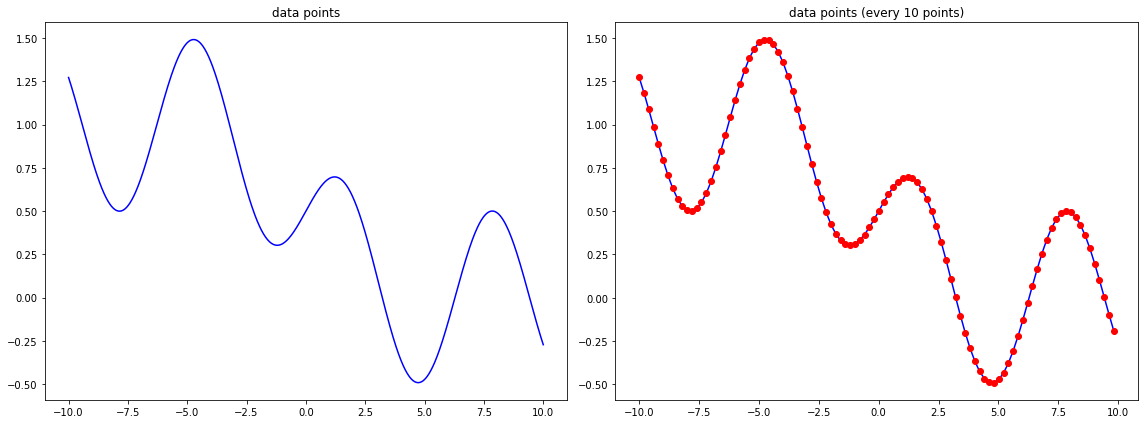

In [35]:
filename    = 'assignment_05_data.csv'
data        = np.loadtxt(filename, delimiter = ',')

x   = data[0, :]    # independent variable
y   = data[1, :]    # dependent variable

x2  = x[::10]       
y2  = y[::10]

plt.figure(figsize=(16,6))

plt.subplot(121)
plt.plot(x, y, '-', color = 'blue')
plt.title('data points')

plt.subplot(122)
plt.plot(x2, y2, '-', color = 'blue')
plt.plot(x2, y2, 'o', color = 'red')
plt.title('data points (every 10 points)')

plt.tight_layout()
plt.show()

In [39]:
print(x,y)

7.697698  -7.677678  -7.657658  -7.637638  -7.617618
  -7.597598  -7.577578  -7.557558  -7.537538  -7.517518  -7.497497
  -7.477477  -7.457457  -7.437437  -7.417417  -7.397397  -7.377377
  -7.357357  -7.337337  -7.317317  -7.297297  -7.277277  -7.257257
  -7.237237  -7.217217  -7.197197  -7.177177  -7.157157  -7.137137
  -7.117117  -7.097097  -7.077077  -7.057057  -7.037037  -7.017017
  -6.996997  -6.976977  -6.956957  -6.936937  -6.916917  -6.896897
  -6.876877  -6.856857  -6.836837  -6.816817  -6.796797  -6.776777
  -6.756757  -6.736737  -6.716717  -6.696697  -6.676677  -6.656657
  -6.636637  -6.616617  -6.596597  -6.576577  -6.556557  -6.536537
  -6.516517  -6.496496  -6.476476  -6.456456  -6.436436  -6.416416
  -6.396396  -6.376376  -6.356356  -6.336336  -6.316316  -6.296296
  -6.276276  -6.256256  -6.236236  -6.216216  -6.196196  -6.176176
  -6.156156  -6.136136  -6.116116  -6.096096  -6.076076  -6.056056
  -6.036036  -6.016016  -5.995996  -5.975976  -5.955956  -5.935936
  -5.9159

In [42]:
print(x2, y2)

[-10.        -9.7998    -9.5996    -9.399399  -9.199199  -8.998999
  -8.798799  -8.598599  -8.398398  -8.198198  -7.997998  -7.797798
  -7.597598  -7.397397  -7.197197  -6.996997  -6.796797  -6.596597
  -6.396396  -6.196196  -5.995996  -5.795796  -5.595596  -5.395395
  -5.195195  -4.994995  -4.794795  -4.594595  -4.394394  -4.194194
  -3.993994  -3.793794  -3.593594  -3.393393  -3.193193  -2.992993
  -2.792793  -2.592593  -2.392392  -2.192192  -1.991992  -1.791792
  -1.591592  -1.391391  -1.191191  -0.990991  -0.790791  -0.590591
  -0.39039   -0.19019    0.01001    0.21021    0.41041    0.610611
   0.810811   1.011011   1.211211   1.411411   1.611612   1.811812
   2.012012   2.212212   2.412412   2.612613   2.812813   3.013013
   3.213213   3.413413   3.613614   3.813814   4.014014   4.214214
   4.414414   4.614615   4.814815   5.015015   5.215215   5.415415
   5.615616   5.815816   6.016016   6.216216   6.416416   6.616617
   6.816817   7.017017   7.217217   7.417417   7.617618   7.81

In [46]:
#
# A : [ x_1^0, x_1^1, ... , x_1^{p-1} ; x_2^0, x_2^1, ... , x_2^{p-1} ; ... ; x_n^0, x_n^1, ... , x_n^{p-1}]
#
def construct_matrix_A(x, p):

    # use functions including : np.power
    
    X=np.array([x]).T
    A=np.power(X,0)
    
    i=1
    while i < p:
        A=np.append(A,np.power(X,i),axis=1)
        i+=1

    return A

#
# x : independent variable
# y : dependent variable
# p : power of the polinomial (theta_0 * x^0, theta_1 * x^1, ..., theta_{p-1} * x^{p-1})
# alpha : coefficient for the regularization term : \| theta \|_2^2
# 1. p=1,2,4,8,16,32p = 1, 2, 4, 8, 16, 32p=1,2,4,8,16,32 without regularization (α=0\alpha = 0α=0)
# 2. p=24p = 24p=24 with regularization (α=0,0.0001,0.001,0.01,0.1,1\alpha = 0, 0.0001, 0.001, 0.01, 0.1, 1α=0,0.0001,0.001,0.01,0.1,1)
#
def solve_polynomial_regression(x, y, p, alpha = 0):
    
    # use functions including : np.identity, np.matmul, np.linalg.inv 
    
    A=construct_matrix_A(x, p)
       
    I= np.identity(A)
    Inv = np.linalg.inv(I)
    h = np.matmul(A,Inv)
    return h

h_01        = solve_polynomial_regression(x, y, 1)
h_02        = solve_polynomial_regression(x, y, 2)
h_04        = solve_polynomial_regression(x, y, 4)
h_08        = solve_polynomial_regression(x, y, 8)
h_16        = solve_polynomial_regression(x, y, 16)
h_32        = solve_polynomial_regression(x, y, 32)

h_24_0      = solve_polynomial_regression(x, y, 24, 0)
h_24_00001  = solve_polynomial_regression(x, y, 24, 0.0001)
h_24_0001   = solve_polynomial_regression(x, y, 24, 0.001)
h_24_001    = solve_polynomial_regression(x, y, 24, 0.01)
h_24_01     = solve_polynomial_regression(x, y, 24, 0.1)
h_24_1      = solve_polynomial_regression(x, y, 24, 1)

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
def plot_polynomial_regression_3x2(x, y, h_01, title_01, h_02, title_02, h_04, title_04, h_08, title_08, h_16, title_16, h_32, title_32):

    plt.figure(figsize=(16,18))

    plt.subplot(321)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_01, '-', color='red')
    plt.title(title_01)

    plt.subplot(322)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_02, '-', color='red')
    plt.title(title_02)

    plt.subplot(323)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_04, '-', color='red')
    plt.title(title_04)

    plt.subplot(324)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_08, '-', color='red')
    plt.title(title_08)

    plt.subplot(325)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_16, '-', color='red')
    plt.title(title_16)

    plt.subplot(326)
    plt.plot(x, y, '-', color='blue')
    plt.plot(x, h_32, '-', color='red')
    plt.title(title_32)

    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue and the polynomial approximations with varying degrees in red ($p = 1, 2, 4, 8, 16, 32$)

In [ ]:
plot_polynomial_regression_3x2(x, y, h_01, '$p = 01$', h_02, '$p = 02$', h_04, '$p = 04$', h_08, '$p = 08$', h_16, '$p = 16$', h_32, '$p = 32$')

### # 02. plot the input data in blue and the polynomial approximations with varying regularization parameters at $p = 24$ ($\alpha = 0, 0.0001, 0.001, 0.01, 0.1, 1$)

In [ ]:
plot_polynomial_regression_3x2(x, y, h_24_0, '$p = 24, alpha = 0$', h_24_00001, '$p = 24, alpha = 0.0001$', h_24_0001, '$p = 24, alpha = 0.001$', h_24_001, '$p = 24, alpha = 0.01$', h_24_01, '$p = 24, alpha = 0.1$', h_24_1, '$p = 24, alpha = 1$')